In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from __future__ import absolute_import, division, print_function


# TensorFlow and tf.keras

import pandas as pd


processed_data = np.load('Full_array.npy')
Blue_processed_data = np.load('Blue_Full_array.npy')
Red_processed_data = np.load("RED_Full_array.npy")
#The size of the dataset is 10,000; but I only filled the first 9166 with values, the rest are zeros. (shouldn't be counted)
number = 9166
processed_data = processed_data[0:number]

#np.random.seed(1)


In [2]:
from PIL import Image
from cv2 import resize
from sklearn.utils import shuffle

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
#hyperparameters:
test_train_split = 0.75
batch_size = 64
epoch_number = 100
validation_split = 0.15
learning_rate = 2e-6
dropout_rate = 0.45
CNL1_filters = 32
CNL1_kernal_size = 5
MPL1_pool_size= (2,2)
MPL1_strides = 2
CNL2_filters = 64
CNL2_kernal_size = 5
MPL2_pool_size = (2,2)
MPL2_strides = 2

In [5]:
#I have a non-round number of examples
train_split_indice = int(np.round(test_train_split*number))

In [6]:
#Load in my dataset of targets, targets are strings labels under the name "Class"
galaxyzoo = pd.read_csv("zoo2MainSpecz.csv/zoo2MainSpecz.csv", usecols=[2,3,4,8,15,21,27], nrows=number)
Class = galaxyzoo["gz2class"].values
RA = galaxyzoo['ra'].values
DEC = galaxyzoo['dec'].values

In [7]:
#I want to take the first character of the Class string and interpret as a integer, ala MNIST example code
dictionary = {'A':int(2),'E':int(1),'S':int(0)}

In [8]:
#resave using my dictionary
target = np.empty((len(Class)))
for i in range(len(Class)):
    target[i] = int(dictionary[Class[i][0]])

In [9]:
#split my data between training and test sets
train_target = target[0:train_split_indice]
test_target = target[train_split_indice:number]
train_images = processed_data[0:train_split_indice]
test_images = processed_data[train_split_indice:number]
Blue_train_images = Blue_processed_data[0:train_split_indice]
Blue_test_images = Blue_processed_data[train_split_indice::]
Red_train_images = Red_processed_data[0:train_split_indice]
Red_test_images = Red_processed_data[train_split_indice::]

In [ ]:
#shuffle the order of the augmented images randomly, shuffle the order of the targets the same way.
#train_images, train_target = shuffle(train_images, train_target, random_state=1)

In [10]:
#reform into the tensor shape
train_images_number = np.shape(train_images)[0]
test_images_number = np.shape(test_images)[0]
train_images = train_images.reshape(train_images_number,28,28,1)
test_images = test_images.reshape(test_images_number,28,28,1)
Blue_train_images = Blue_train_images.reshape(train_images_number,28,28,1)
Blue_test_images = Blue_test_images.reshape(test_images_number,28,28,1)
Red_train_images = Red_train_images.reshape(train_images_number,28,28,1)
Red_test_images = Red_test_images.reshape(test_images_number,28,28,1)

In [11]:
#now append my arrays together to get 3-channel images

train_images_middle_step = np.append(Red_train_images, train_images, 3)
train_images = np.append(train_images_middle_step, Blue_train_images, 3)

test_images_middle_step = np.append(Red_test_images,test_images, 3)
test_images = np.append(test_images_middle_step,Blue_test_images, 3)

In [12]:
#define my model, using a CNN with 2 Convolutional layers, 2 max pool layers, 1 dense layer, 1 drop out layer, and another dense layer 
def create_model(dropout_rate=dropout_rate, learning_rate=learning_rate):
    
    model = keras.Sequential([])
    model.add(keras.layers.Conv2D(input_shape=(28,28,3),filters=CNL1_filters,kernel_size=CNL1_kernal_size,padding="same",activation=tf.nn.relu))
    model.add(keras.layers.MaxPool2D(pool_size=MPL1_pool_size, strides=MPL1_strides))
    model.add(keras.layers.Conv2D(filters=CNL2_filters,kernel_size=CNL2_kernal_size,padding="same",activation=tf.nn.relu))
    model.add(keras.layers.MaxPool2D(pool_size=MPL2_pool_size,strides=MPL2_strides))
    model.add(keras.layers.Reshape([7*7*64]))
    model.add(keras.layers.Dense(units=1024,activation=tf.nn.relu))
    model.add(keras.layers.Dropout(rate=dropout_rate))
    model.add(keras.layers.Dense(units=3,activation=tf.nn.softmax))
    adam = keras.optimizers.Adam(lr = learning_rate)
    model.compile(optimizer=adam, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return(model)

In [20]:
#lets try a data generator to do the augmentations. I choose to do this now because I had determined that I incorrectly implemented
#it in a past attempt, and so believed that it was not working well with my NN. And secondly, now that I have three times the amount
#of data, I fear holding everything in memory like I did in the past.

datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=40,
    zoom_range=0.3,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    data_format='channels_last',
    validation_split=validation_split)

datagen.fit(train_images)



Epoch 1/100
108/107 [==============================] - 25s 233ms/step - loss: 0.9488 - accuracy: 0.5669
Epoch 2/100
108/107 [==============================] - 24s 221ms/step - loss: 0.7857 - accuracy: 0.6164
Epoch 3/100
108/107 [==============================] - 24s 222ms/step - loss: 0.7252 - accuracy: 0.6343
Epoch 4/100
108/107 [==============================] - 22s 208ms/step - loss: 0.6850 - accuracy: 0.6511
Epoch 5/100
108/107 [==============================] - 23s 210ms/step - loss: 0.6723 - accuracy: 0.6546
Epoch 6/100
108/107 [==============================] - 23s 216ms/step - loss: 0.6611 - accuracy: 0.6610
Epoch 7/100
108/107 [==============================] - 22s 201ms/step - loss: 0.6528 - accuracy: 0.6621
Epoch 8/100
108/107 [==============================] - 22s 202ms/step - loss: 0.6493 - accuracy: 0.6622
Epoch 9/100
108/107 [==============================] - 22s 208ms/step - loss: 0.6425 - accuracy: 0.6704
Epoch 10/100
108/107 [==============================] - 22s 203m

108/107 [==============================] - 22s 200ms/step - loss: 0.5712 - accuracy: 0.7200
Epoch 80/100
108/107 [==============================] - 22s 201ms/step - loss: 0.5745 - accuracy: 0.7188
Epoch 81/100
108/107 [==============================] - 22s 200ms/step - loss: 0.5725 - accuracy: 0.7197
Epoch 82/100
108/107 [==============================] - 22s 200ms/step - loss: 0.5708 - accuracy: 0.7163
Epoch 83/100
108/107 [==============================] - 22s 201ms/step - loss: 0.5696 - accuracy: 0.7137
Epoch 84/100
108/107 [==============================] - 22s 200ms/step - loss: 0.5668 - accuracy: 0.7197
Epoch 85/100
108/107 [==============================] - 22s 201ms/step - loss: 0.5721 - accuracy: 0.7157
Epoch 86/100
108/107 [==============================] - 22s 201ms/step - loss: 0.5672 - accuracy: 0.7208
Epoch 87/100
108/107 [==============================] - 22s 200ms/step - loss: 0.5682 - accuracy: 0.7181s - loss:
Epoch 88/100
108/107 [==============================] - 22s

In [26]:
model = create_model(dropout_rate=dropout_rate, learning_rate = learning_rate)

history = model.fit_generator(datagen.flow(train_images, train_target, batch_size=batch_size),
                    steps_per_epoch=len(train_target) / batch_size,
                    epochs=epoch_number,
                    validation_data=datagen.flow(train_images, train_target))

Epoch 1/100
108/107 [==============================] - 36s 329ms/step - loss: 0.9673 - accuracy: 0.5185 - val_loss: 0.8220 - val_accuracy: 0.6154
Epoch 2/100
108/107 [==============================] - 32s 296ms/step - loss: 0.7889 - accuracy: 0.6091 - val_loss: 0.7232 - val_accuracy: 0.6449
Epoch 3/100
108/107 [==============================] - 29s 272ms/step - loss: 0.7199 - accuracy: 0.6305 - val_loss: 0.6783 - val_accuracy: 0.6571
Epoch 4/100
108/107 [==============================] - 29s 272ms/step - loss: 0.6856 - accuracy: 0.6383 - val_loss: 0.6562 - val_accuracy: 0.6664
Epoch 5/100
108/107 [==============================] - 29s 271ms/step - loss: 0.6677 - accuracy: 0.6469 - val_loss: 0.6416 - val_accuracy: 0.6680
Epoch 6/100
108/107 [==============================] - 29s 270ms/step - loss: 0.6576 - accuracy: 0.6562 - val_loss: 0.6323 - val_accuracy: 0.6797
Epoch 7/100
108/107 [==============================] - 29s 270ms/step - loss: 0.6484 - accuracy: 0.6631 - val_loss: 0.6262 -

Epoch 57/100
108/107 [==============================] - 29s 269ms/step - loss: 0.5822 - accuracy: 0.7105 - val_loss: 0.5740 - val_accuracy: 0.7201
Epoch 58/100
108/107 [==============================] - 29s 269ms/step - loss: 0.5852 - accuracy: 0.7082 - val_loss: 0.5744 - val_accuracy: 0.7178
Epoch 59/100
108/107 [==============================] - 29s 272ms/step - loss: 0.5832 - accuracy: 0.7089 - val_loss: 0.5743 - val_accuracy: 0.7220
Epoch 60/100
108/107 [==============================] - 29s 269ms/step - loss: 0.5838 - accuracy: 0.7124 - val_loss: 0.5728 - val_accuracy: 0.7224
Epoch 61/100
108/107 [==============================] - 30s 277ms/step - loss: 0.5810 - accuracy: 0.7147 - val_loss: 0.5726 - val_accuracy: 0.7208
Epoch 62/100
108/107 [==============================] - 30s 277ms/step - loss: 0.5774 - accuracy: 0.7179 - val_loss: 0.5683 - val_accuracy: 0.7226
Epoch 63/100
108/107 [==============================] - 29s 270ms/step - loss: 0.5813 - accuracy: 0.7130 - val_loss: 0

In [27]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


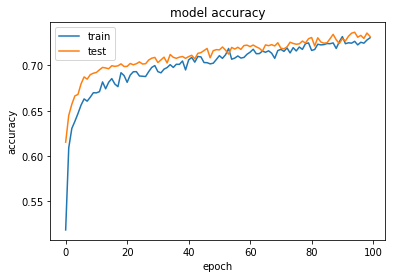

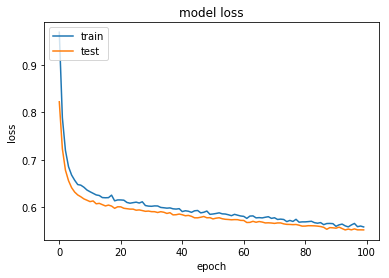

In [28]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('CNN_Learning_GZ2_5_11_19_acc.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('CNN_Learning_GZ2_5_11_19_loss.png')
plt.show()

In [29]:
#model.summary()
test_loss, test_acc = model.evaluate(test_images, test_target)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

#0.70 accuracy using the datagen and 100 epochs, also I messed up the validation so retrying

2292/2292 [==============================] - 2s 1ms/sample - loss: 0.5643 - accuracy: 0.7544
Test accuracy: 0.754363
Test loss: 0.564315639865336


<b>Update(5/11/19)</b> This was just thrown together today to see if augmentation with the full image channels would increase accuracy. Not surprisingly, results are similar to the other ones before augmentation. Accuracy after 100 epochs not increasing substantially. 

What is hopeful is that the accuracy has not crossed over yet and still has a increasing trend.


<img src='CNN_Learning_GZ2_5_11_19_acc.png'>

<img src='CNN_Learning_GZ2_5_11_19_loss.png'>